## CASE STUDY

# 1. Merge the datasets


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cust = pd.read_csv('/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/Customer.csv')              #importing thr datasets
trans = pd.read_csv('/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/Transactions.csv')
prod_cat = pd.read_csv('/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/prod_cat_info.csv')

In [3]:
#cust.head()              #understanding the data
#trans.head()
#prod_cat.head()
#cust.describe()
#trans.describe()

#trans.duplicated(subset=['transaction_id']) #some insights 

In [4]:
#print (trans.columns)
#print(cust.columns)
#print(prod_cat.columns)

cust.rename(columns = {'customer_Id' : 'cust_id'} , inplace = True)                               #fixing column names to make joins
prod_cat.rename(columns = {'prod_sub_cat_code' : 'prod_subcat_code'} , inplace = True)

#cust.head(2)
#prod_cat.head(2)

In [5]:
final = trans.merge(cust,on = 'cust_id', how = 'left').merge(prod_cat,on = ['prod_cat_code', 'prod_subcat_code'],how = 'left')  #final dataset with all the data,"join"
final.head(2)                  
#final.shape


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers


# 2. Check the duplicates if there are any duplicates drop them.


In [6]:
print("total duplicates in final dataset:" ,final.duplicated().sum())

total duplicates in final dataset: 13


In [7]:
print(final.shape)
final.drop_duplicates(keep = 'first', inplace = True) 
print(final.shape)



(23053, 15)
(23040, 15)


# 3. Check for the null/missing values.


In [8]:
print(final.shape)
print(final.isnull().sum())        #checking for null values in dataset

(23040, 15)
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64


# 4. Prepare summary report for all the columns.


<AxesSubplot:ylabel='Frequency'>

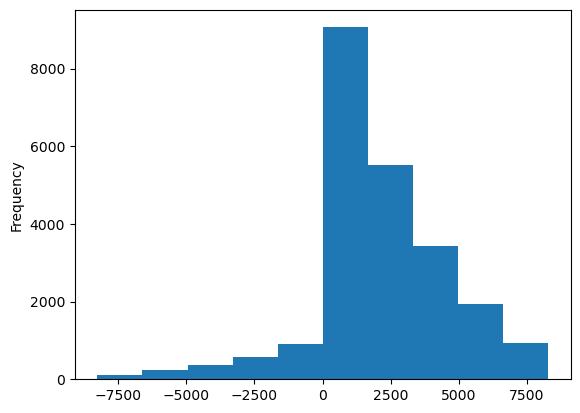

In [9]:
final['total_amt'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

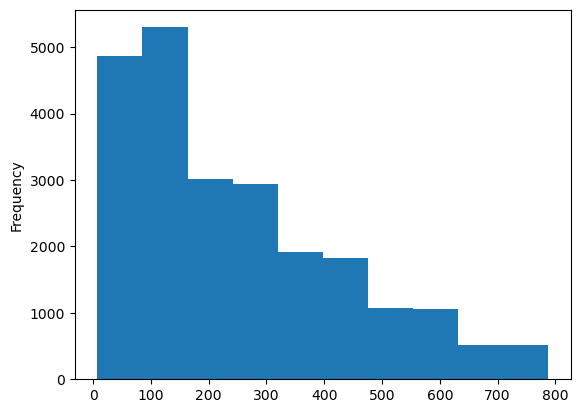

In [10]:
final['Tax'].plot(kind = 'hist')

<AxesSubplot:xlabel='prod_cat_code', ylabel='Rate'>

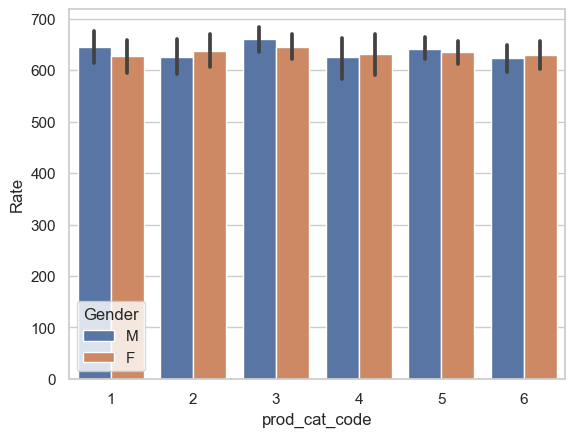

In [12]:
sns.set(style='whitegrid')
sns.barplot(x="prod_cat_code",
                    y="Rate",
                    hue="Gender",
                    data=final)